## Simulating data for intro-ml

### Required software

In [1]:
# pip install -e . from cloned intro-ml repo to install simcat
# pip install -e . from cloned toytree repo toyplot

In [2]:
import h5py
import simcat   
import toytree    ## requires github Master branch currently
import random
import numpy as np

### `simcat` has two class objects

In [3]:
print simcat.Model
print simcat.DataBase

<class 'simcat.simcat.Model'>
<class 'simcat.simcat.DataBase'>


### The `simcat.Model` object
This class is used to simulate count matrices for a given tree with provided admixture events. Trees are entered as either newick strings or as Toytree objects. Adding the `debug=True` argument prints more info about the generated data set. 

In [4]:
## generate a random tree
random.seed(123)
tree = toytree.rtree(5)
tree.tree.convert_to_ultrametric()
tree.draw(tree_style='c', node_labels='idx', tip_labels=False, padding=50);

idx: 0
name: t-4
dist: 1.0
support: 100
height: 0.0 0 idx: 1
name: t-3
dist: 1.0
support: 100
height: 0.0 1 idx: 2
name: t-2
dist: 2.0
support: 100
height: 0.0 2 idx: 3
name: t-1
dist: 1.5
support: 100
height: 0.0 3 idx: 4
name: t-0
dist: 1.5
support: 100
height: 0.0 4 idx: 5
name: i5
dist: 1.0
support: 1
height: 1.0 5 idx: 6
name: i6
dist: 1.0
support: 1
height: 2.0 6 idx: 7
name: i7
dist: 1.5
support: 1
height: 1.5 7 idx: 8
name: i8
dist: 0.0
support: 100
height: 3.0 8

In [5]:
## simulate counts for a tree with no admixture
m1 = simcat.Model(tree, nreps=3, debug=True)
m1.run()
m1.counts.shape

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)



(3, 5, 16, 16)

In [6]:
## simulate counts for a tree with one admixture edge [2->1, interval 0.2-0.5, rate 0.1]
m2 = simcat.Model(tree, admixture_edges=[(2, 1, 0.2, 0.5, 0.1)], nreps=3, debug=True)
m2.run()
m2.counts.shape

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)
demog mig: (0.2, 0.5, 0.1, (2, 1))

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)
demog mig: (0.2, 0.5, 0.1, (2, 1))

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)
demog mig: (0.2, 0.5, 0.1, (2, 1))



(3, 5, 16, 16)

In [7]:
## simulate counts for 'ntests' admix events uniformly spread across the edge [2->1]
m3 = simcat.Model(tree, admixture_edges=[(2, 1, None, None, None)], nreps=3, debug=True)
m3.run()
m3.counts.shape

uniform testvals mig: (0, 200000) (0.0, 0.5)
demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)
demog mig: (40912.0, 113545.0, 0.4648, (2, 1))

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)
demog mig: (119108.0, 192902.0, 0.1582, (2, 1))

demog div: (600000, 3, 0)
demog div: (300000, 4, 3)
demog div: (400000, 2, 0)
demog div: (200000, 1, 0)
demog mig: (130635.0, 149781.0, 0.092, (2, 1))



(3, 5, 16, 16)

### Example range of values generated
The `__init__` function of Model generates and stores all of the values that it will use across all of the simulations it will run. The actual simulations are not run until you call `.run()`. 

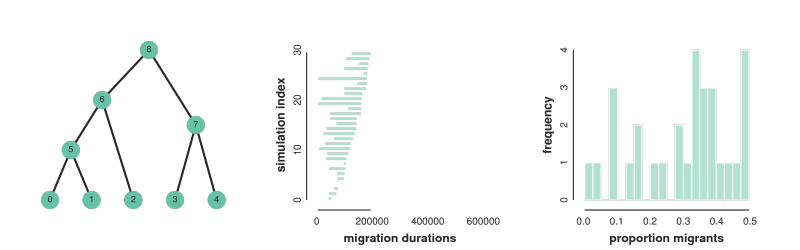

In [8]:
m4 = simcat.Model(tree, admixture_edges=[(2, 1, 0.0, 0.2, 0.1)], nreps=30)
m4.plot_test_values()


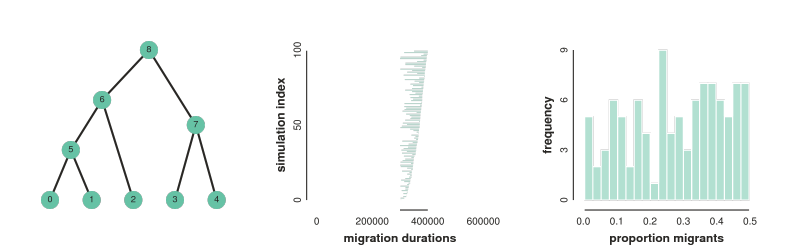

In [10]:
m4 = simcat.Model(tree, admixture_edges=[(5, 7, None, None, None)], nrep=30)
m4.plot_test_values()


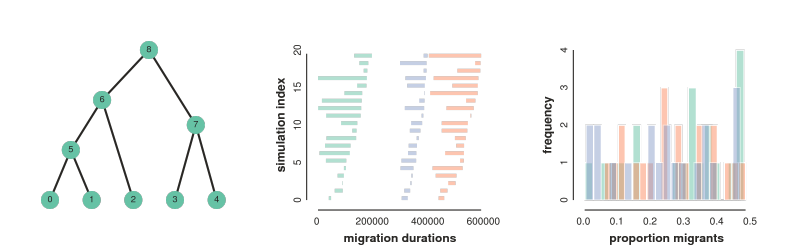

In [11]:
edges = [
    (2, 1, None, None, None), 
    (6, 7, None, None, None), 
    (7, 2, None, None, None),
    ]
m5 = simcat.Model(tree, admixture_edges=edges, nreps=20)
m5.plot_test_values()

## The `simcat.DataBase` object

The `DataBase` object, in development, could take the list of generated trees and loop over all trees and edges on those trees, and then call `simcat.Model` to sample a range of admixture events on those edges and generate count matrices. The main job of the `DataBase` object is to parallelize all of those simulations and store the results. The results should be stored in a HDF5 database with metadata about the params of the test. 

In [16]:
## init a database
db1 = simcat.DataBase(
    name="test-1", 
    workdir="./databases", 
    tree=tree, 
    nedges=1,
    ntests=20,
    force=True)

Do you really want to overwrite the database? (y/n) yes
stored 64000 labels to ./databases/test-1.hdf5


In [14]:
## just connects so far, does not run anything
db1.run2()

host compute node: [40 cores] on sacra
ready to run


# TODOs

### (1) Writing the `Database.run` function 
The way we have it now Database.run will need to call Model.run(), which means that we would need to store all of the Model objects. That's not ideal. It would be better if the Database, once generated, can stand alone be run, stopped, restarted, etc. just from the info in it. I think we can do that but it will take a little work. 

### (2) Storing data more efficiently
If a lot of the data stays the same over the `nreps` dimension then we should presumably be able to store those values just once instead of `nreps` times. The only worry is that users may add a bunch of values to the database with nreps=100 and then add more with nreps=1000. We could enforce nreps to not be changeable after init, or we could store nreps as an extra column so that we can just re-replicate the values later when handing them into the ML program. This approach has the downside of making it a bit trickier to randomly sample rows from the final super large array though..., which we'll probably do using something like dask. 

### (3) Can we rebuild Model objects from the database info?
Seem doable... nb: should store newick topo in hdf5 once as an attr. 

In [ ]:
## remake the tree with fixed topo from edge_lengths
#...


## rebuild the admixture_edges from admix labels
#...


## resample params like Ne...
#...

